# 4. Trees

In [3]:
# Imports
import io
import requests

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score



# Load dataset

url = 'https://raw.githubusercontent.com/rrsr28/Sign-Language-Recognition/main/Dataset.csv'
#Raw url: 'https://github.com/rrsr28/Sign-Language-Recognition/blob/main/Dataset.csv'

#data = cudf.read_csv(url)
data = pd.read_csv(url)
print((len(data.columns)))

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Preprocessing
X = np.array(X)
y = np.array(y)

original_labels = np.unique(y)

encoder = LabelEncoder()
y = encoder.fit_transform(y) # Convert labels to numerical values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

64


In [6]:
#Train
#Ensemble

import pickle

params = [{'n_estimators': [10, 20], 'min_samples_leaf': [7, 8, 9]},
          {'n_estimators': [10, 20], 'max_samples': [1, 3, 5, 10]},
          [{'algorithm': ['SAMME']}]
]

# Params for each model
models = [
    RandomForestClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
]

for i in range(3):
    grid_search_model = GridSearchCV(models[i], params[i], verbose=2, cv=5, scoring='accuracy', refit='AUC')
    grid_search_model.fit(X_train, y_train)

    print(models[i])
    print(grid_search_model.best_params_)
    print('----------------------------------')


    best_model = grid_search_model.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Save the model
    with open(str(f'models/model_{type(best_model).__name__}.pkl'), 'wb') as f:
        pickle.dump(best_model, f)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................min_samples_leaf=7, n_estimators=10; total time=   0.4s
[CV] END ................min_samples_leaf=7, n_estimators=10; total time=   0.4s
[CV] END ................min_samples_leaf=7, n_estimators=10; total time=   0.4s
[CV] END ................min_samples_leaf=7, n_estimators=10; total time=   0.4s
[CV] END ................min_samples_leaf=7, n_estimators=10; total time=   0.4s
[CV] END ................min_samples_leaf=7, n_estimators=20; total time=   0.9s
[CV] END ................min_samples_leaf=7, n_estimators=20; total time=   0.9s
[CV] END ................min_samples_leaf=7, n_estimators=20; total time=   0.8s
[CV] END ................min_samples_leaf=7, n_estimators=20; total time=   0.8s
[CV] END ................min_samples_leaf=7, n_estimators=20; total time=   0.8s
[CV] END ................min_samples_leaf=8, n_estimators=10; total time=   0.4s
[CV] END ................min_samples_leaf=8, n_es

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

[CV] END ....................................algorithm=SAMME; total time=   3.4s
[CV] END ....................................algorithm=SAMME; total time=   3.4s
[CV] END ....................................algorithm=SAMME; total time=   3.2s
[CV] END ....................................algorithm=SAMME; total time=   3.5s
[CV] END ....................................algorithm=SAMME; total time=   4.0s
AdaBoostClassifier()
{'algorithm': 'SAMME'}
----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.33      0.07      0.11        60
           2       1.00      0.07      0.12        60
           3       0.17      0.87      0.28        60
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        60
           7       0.00      0.00      0.00        60
           8       0.00      

/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/golachoo/anaconda3/envs/machinelearing_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

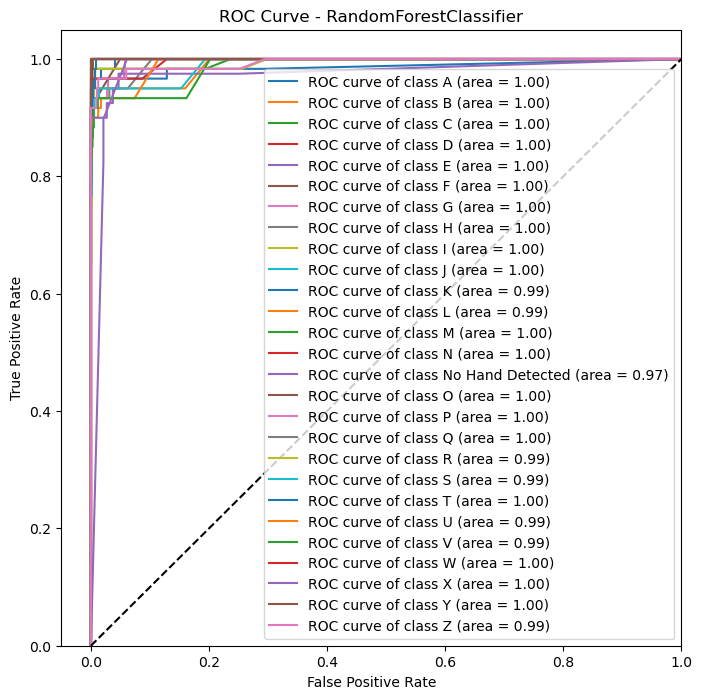

In [8]:
# ROC, AUC - RandomForestClassifier

import pickle
from matplotlib import pyplot as plt
import numpy as np

# Load model
with open('models/model_RandomForestClassifier.pkl', 'rb') as f:
    model = pickle.load(f)


num_classes = len(np.unique(y))

fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()

# Get predicted probabilities for each class
y_probs = model.predict_proba(X_test) 

for i in range(num_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for all classes
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label= f'ROC curve of class {original_labels[i]} (area = {roc_auc[i]*1:0.2f})')

    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

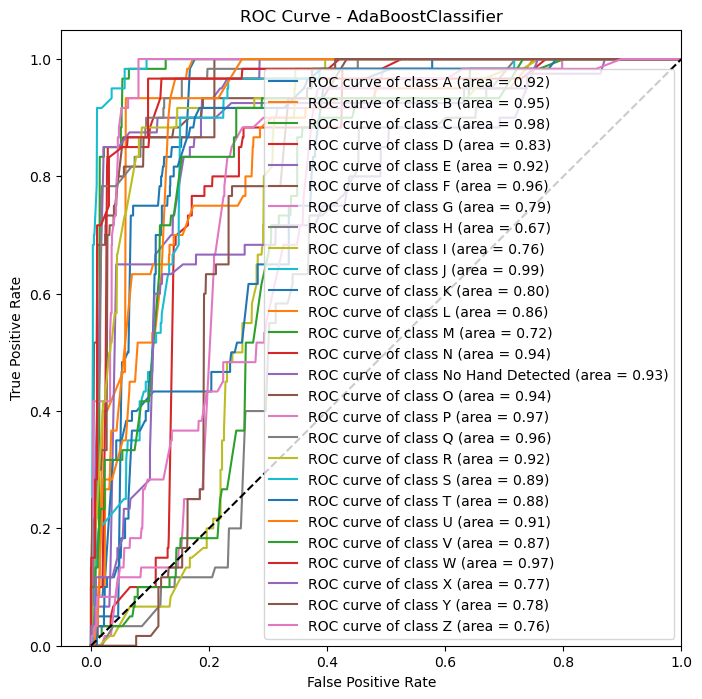

In [9]:
# ROC, AUC - AdaBoostClassifier

import pickle
from matplotlib import pyplot as plt
import numpy as np

# Load model
with open('models/model_AdaBoostClassifier.pkl', 'rb') as f:
    model = pickle.load(f)


num_classes = len(np.unique(y))

fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()

# Get predicted probabilities for each class
y_probs = model.predict_proba(X_test) 

for i in range(num_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for all classes
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label= f'ROC curve of class {original_labels[i]} (area = {roc_auc[i]*1:0.2f})')

    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoostClassifier')
plt.legend(loc='lower right')
plt.show()

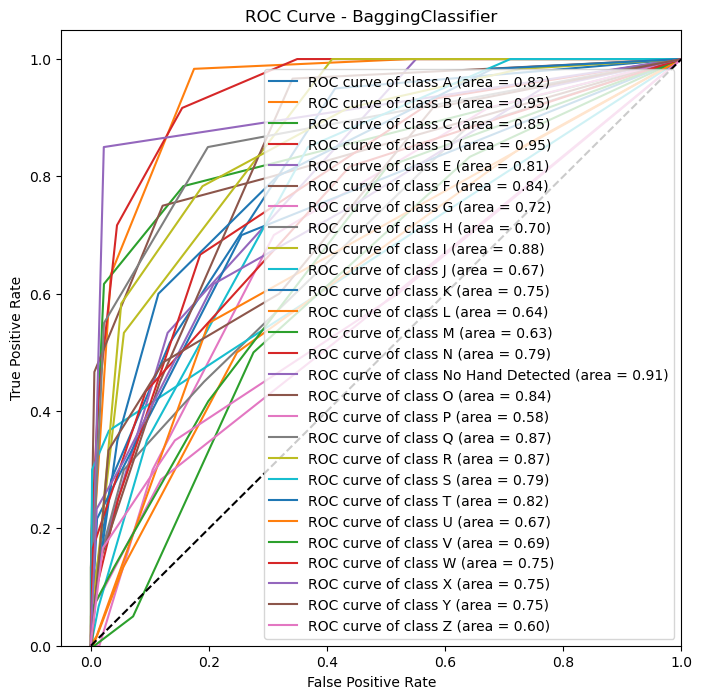

In [10]:
# ROC, AUC - BaggingClassifier

import pickle
from matplotlib import pyplot as plt
import numpy as np

# Load model
with open('models/model_BaggingClassifier.pkl', 'rb') as f:
    model = pickle.load(f)


num_classes = len(np.unique(y))

fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()

# Get predicted probabilities for each class
y_probs = model.predict_proba(X_test) 

for i in range(num_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for all classes
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label= f'ROC curve of class {original_labels[i]} (area = {roc_auc[i]*1:0.2f})')

    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BaggingClassifier')
plt.legend(loc='lower right')
plt.show()